# Python Finance Analysis


Project Details: Data Analysis & Visualisation of Bank Stocks <br>
Langauge: Python <br>
Enviornment: Jupyter Notebook IDE<br>
Python Libraries: Pandas, Numpy, Matplotlib, Seaborn, data_reader, plotly & Cufflinks<br>
Dataset: YAHOO finance for Bank Stock Data<br>





In [4]:
from pandas_datareader import data as pdr
from pandas.util.testing import assert_frame_equal
import pandas as pd
import numpy as np
import os
import datetime
%matplotlib inline

In [5]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [6]:
# Looking at data from 2006 to 2016
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [7]:
#get every bank
BAC = pdr.get_data_yahoo('BAC',start,end)
C = pdr.get_data_yahoo('C', start, end)
GS = pdr.get_data_yahoo('GS', start, end)
JPM= pdr.get_data_yahoo('JPM', start, end)
MS= pdr.get_data_yahoo('MS', start, end)
WFC= pdr.get_data_yahoo('WFC', start, end)

In [8]:
# Get those tickers from each bank and put it together call it "bank_stocks"

In [10]:
tickers= ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'] 
sorted_tickers= sorted(tickers)
print(sorted_tickers)
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=sorted_tickers)

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']


In [11]:
#set column names
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [ ]:
# Let's find close price for each bank 
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

In [14]:
#Lets look at each bank's return too
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [15]:
#Let's look at each bank's maximum return at what date to see 2008 Housing crisis effect
returns.idxmax(axis=0)

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

# Visualization 

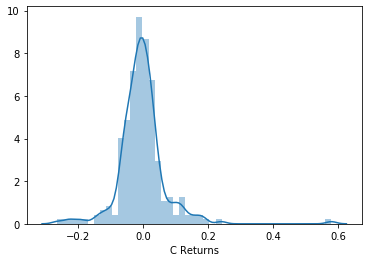

In [21]:
# Create citibank's 2008 returns ( Housing Crisis)
import seaborn as sns
%matplotlib inline
sns.distplot(returns['C Returns']['2008'])

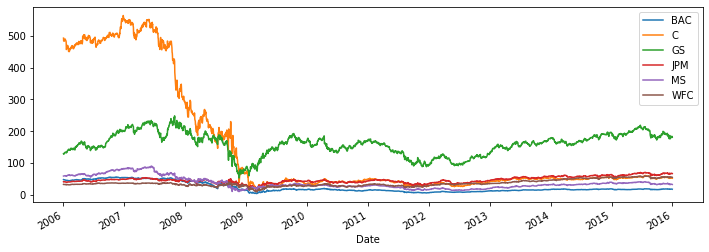

In [24]:
#Closing Price for each bank
# Optional Plotly Method Imports
import matplotlib.pyplot as plt
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008( Housing Crisis).

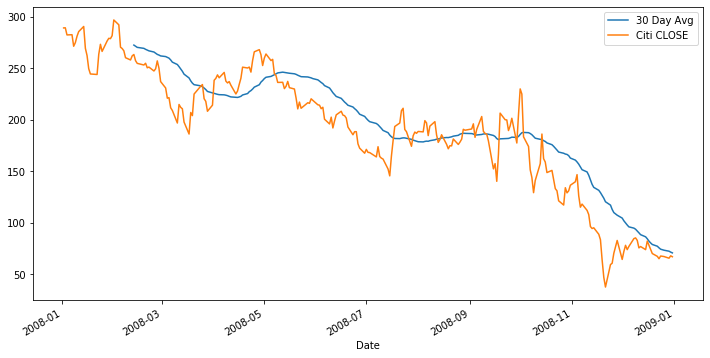

In [29]:
# 30 day average against the Close price of Citi in 2008
plt.figure(figsize=(12,6))
C['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].loc['2008-01-01':'2009-01-01'].plot(label='Citi CLOSE')
plt.legend()

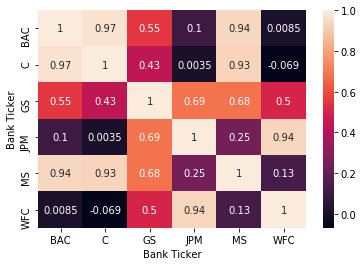

In [30]:
# Let's look at heatmaps of each bank
sns.heatmap(bank_stocks.xs(key='Close',
axis=1,level='Stock Info').corr(),annot=True)

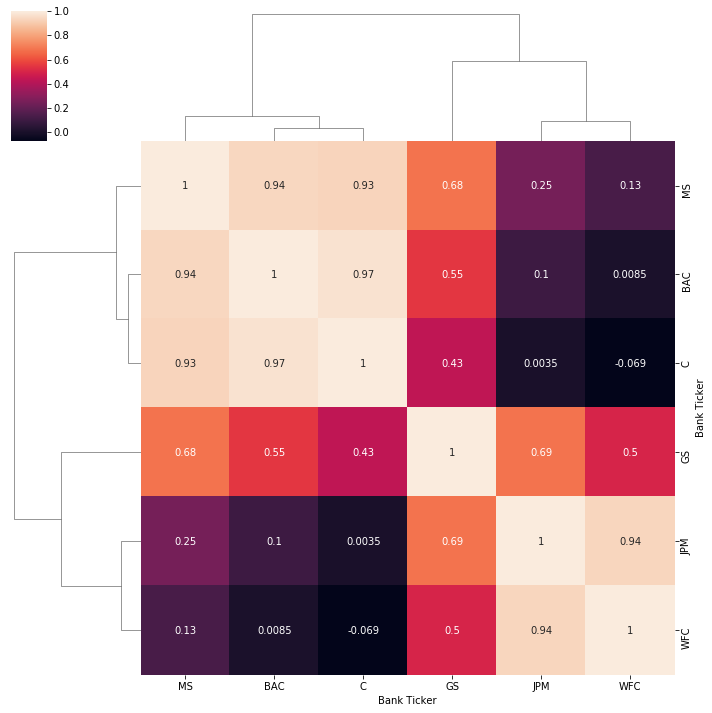

In [31]:
# Let's look at ClusterMaps of each bank
sns.clustermap(bank_stocks.xs(key='Close',
axis=1, level='Stock Info').corr(), annot=True)

# Interactive Visualization


In [32]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For offline use
cf.go_offline()
# For Notebooks
init_notebook_mode(connected=True)

In [34]:
# Effect of Housing Crisis in Citi Bank's stocks in 2008
C[['Open', 'High', 'Low', 'Close']].loc
['2007-01-01':'2010-01-01'].iplot(kind='candle')

In [35]:
# Simple Moving Average of Citi Bank for 2008
C['Close'].loc['2007-01-01':'2010-01-01'].ta_plot(study='sma',
periods=[13,21,55],title='Simple Moving Averages')

In [37]:
# Bollinger band in Citi's stocks helps us signal BUY and SELL stocks in 2008
C['Close'].loc['2007-01-01':'2010-01-01'].ta_plot(study='boll',
        title='Bollinger Bands Plot')
# If you bought stocks pre Housing Crisis as in day before, big OOF

In [38]:
# Next Project I introduce Machine Learning for these data